# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as sp
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling_dice(n):

    dice = [1,2,3,4,5,6]
    roll = np.random.choice(dice,n)
    return (list(roll))
    
print(rolling_dice(10))
rolling_dice_df = pd.DataFrame(rolling_dice(10))
rolling_dice_df.head(10)

[5, 2, 5, 6, 5, 4, 3, 2, 3, 5]


,0
0,5
1,1
2,1
3,1
4,5
5,3
6,2
7,3
8,5
9,4


#### 2.- Plot the results sorted by value.

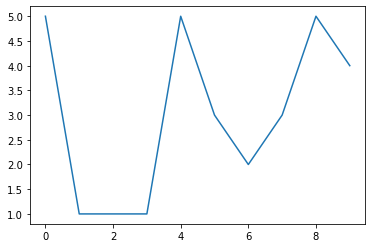

In [3]:
# your code here
plt.plot(rolling_dice_df).sort()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

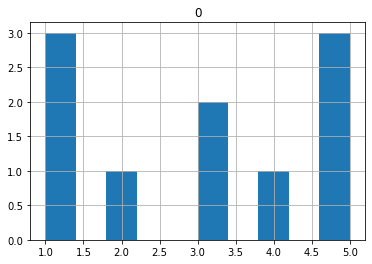

In [6]:
# your code here
rolling_dice_df.hist()

In [ ]:
"""
The difference is that in this plot we can see the number of times a given side of the dice is revealed. For example, the side with 1 rolled 5 (five) times. 
In the above plot, we could only see the numbers that occur one by one.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here

#change name of column
rollDice = rolling_dice_df.rename(columns={0:'results'})


# dataframe to list
rollDiceList = rollDice['results'].tolist()


def mean(x):
    mean = sum(x) / len(x)
    return(mean)


mean(rollDiceList)
    

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here

def frequencyDistribution(x):
    
    dice = [1,2,3,4,5,6]
    frequencyDistributionList = [x.count(i) for i in dice]
    
    return frequencyDistributionList

# calculating the mean
freq = frequencyDistribution(rollDiceList)

mean(freq)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [ ]:
# your code here


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [23]:
# your code here

#read csv
rollDice100 = pd.read_csv("path tho csv")

#create dataframe
pd.DataFrame(rollDice100)


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


<AxesSubplot:>

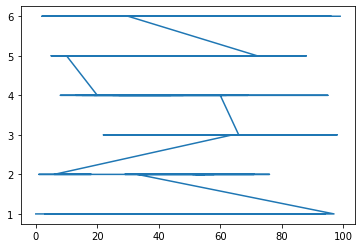

In [24]:
rollDice100sort = rollDice100.sort_values(by='value')
#dice_sorted.head()

rollDice100sort['value'].plot()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [25]:
# your code here

rollDice100List = rollDice100sort['value'].tolist()
mean(rollDice100List)

3.74

#### 3.- Now, calculate the frequency distribution.


In [26]:
# your code here

frequencyDistribution(rollDice100List)

[12, 17, 14, 22, 12, 23]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

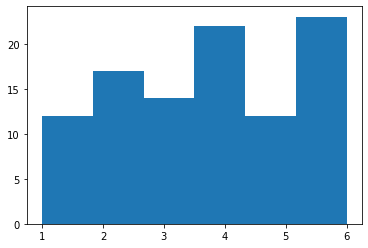

In [27]:
# your code here

plt.hist(rollDice100List,6)
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [29]:
# your code here

agesPopulationMain = pd.read_csv("path tho csv")
agesPopulationMain.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


/Users/pedroafflalo/opt/anaconda3/envs/Ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

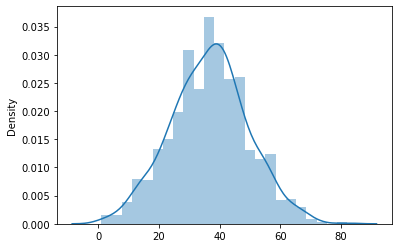

In [30]:
sns.distplot(agesPopulationMain)

In [ ]:
#Mean = 35
#STD = 25

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [34]:
# your code here

agesPopulationMean = np.mean(agesPopulationMain)
agesPopulationSTD = agesPopulationMain.std()

display(agesPopulationMean)
display(agesPopulationSTD)

observation    36.56
dtype: float64

observation    12.8165
dtype: float64

In [ ]:
"""
While the mean is near my guess, i cannot say the same about standard deviation
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [35]:
# your code here
agesPopulation2 = pd.read_csv('path tho csv')
agesPopulation2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


/Users/pedroafflalo/opt/anaconda3/envs/Ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

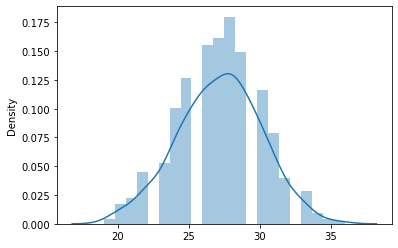

In [36]:
sns.distplot(agesPopulation2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The population is younger comparing with the first dataset. And there are some gaps in the x axis values.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [37]:
# your code here

agesPopulationMean2 = np.mean(agesPopulation2)
agesPopulationSTD2 = agesPopulation2.std()

display(agesPopulationMean2)
display(agesPopulationSTD2)

observation    27.155
dtype: float64

observation    2.969814
dtype: float64

In [ ]:
"""
The average age is 27, below the average age in the first dataset. The standard deviation value is 2.96 wich is much lower than the one in the first dataset
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [38]:
# your code here

agesPopulation3 = pd.read_csv('path tho csv')
agesPopulation3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


/Users/pedroafflalo/opt/anaconda3/envs/Ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

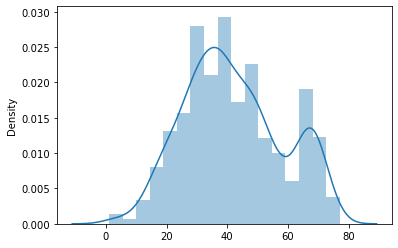

In [39]:
sns.distplot(agesPopulation3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [40]:
# your code here

agesPopulationMean3 = np.mean(agesPopulation3)
agesPopulationSTD3 = agesPopulation3.std()

display(agesPopulationMean3)
display(agesPopulationSTD3)

observation    41.989
dtype: float64

observation    16.144706
dtype: float64

In [ ]:
"""
The average age is 41.9 ~ 42 years, wich is higher than the average ages in the previous datasets.
Standard Deviation is 16.144
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [44]:
# your code here
print("1st quartile = " + str(np.percentile(agesPopulation3, 25)))
print("2nd quartile = " + str(np.percentile(agesPopulation3, 50)))
print("3rd quartile = " + str(np.percentile(agesPopulation3, 75)))
print("the difference between median and mean is " + str(np.percentile(agesPopulation3, 50) - mean))

1st quartile = 30.0
2nd quartile = 40.0
3rd quartile = 53.0


TypeError: unsupported operand type(s) for -: 'float' and 'function'

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [46]:
# your code here


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""